# **TikTok Project**
**Course 6 - The Nuts and bolts of machine learning**

Recall that you are a data professional at TikTok. Your supervisor was impressed with the work you have done and has requested that you build a machine learning model that can be used to determine whether a video contains a claim or whether it offers an opinion. With a successful prediction model, TikTok can reduce the backlog of user reports and prioritize them more efficiently.

A notebook was structured and prepared to help you in this project. A notebook was structured and prepared to help you in this project. Please complete the following questions.

# **Course 6 End-of-course project: Classifying videos using machine learning**

In this activity, you will practice using machine learning techniques to predict on a binary outcome variable.
<br/>

**The purpose** of this model is to increase response time and system efficiency by automating the initial stages of the claims process.

**The goal** of this model is to predict whether a TikTok video presents a "claim" or presents an "opinion".
<br/>

*This activity has three parts:*

**Part 1:** Ethical considerations
* Consider the ethical implications of the request

* Should the objective of the model be adjusted?

**Part 2:** Feature engineering

* Perform feature selection, extraction, and transformation to prepare the data for modeling

**Part 3:** Modeling

* Build the models, evaluate them, and advise on next steps

Follow the instructions and answer the questions below to complete the activity. Then, you will complete an Executive Summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.



# **Classify videos using machine learning**

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**

### **Task 1. Imports and data loading**

Start by importing packages needed to build machine learning models to achieve the goal of this project.

In [2]:
# Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [3]:
# Load dataset into dataframe
df = pd.read_csv("tiktok_dataset.csv")

<img src="images/Analyze.png" width="100" height="100" align=left>

## **PACE: Analyze**

Consider the questions in your PACE Strategy Document to reflect on the Analyze stage.

### **Task 2: Examine data, summary info, and descriptive stats**

In [4]:
# Display first few rows
df.head(5)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [5]:
# Get number of rows and columns
df.shape

(19382, 12)

Get the data types of the columns.

In [6]:
# Get data types of columns
df.dtypes

#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

Get basic information about the dataset.

In [7]:
# Get basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


Generate basic descriptive statistics about the dataset.

In [8]:
# Generate basic descriptive stats
df.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


Check for and handle missing values.

In [9]:
# Check for missing values
df.isnull().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [10]:
# Drop rows with missing values
df = df.dropna(axis=0)
df.isnull().sum()

#                           0
claim_status                0
video_id                    0
video_duration_sec          0
video_transcription_text    0
verified_status             0
author_ban_status           0
video_view_count            0
video_like_count            0
video_share_count           0
video_download_count        0
video_comment_count         0
dtype: int64

In [11]:
# Display first few rows after handling missing values
df.head(10)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0
5,6,claim,8972200955,35,someone shared with me that gross domestic pro...,not verified,under review,336647.0,175546.0,62303.0,4293.0,1857.0
6,7,claim,4958886992,16,someone shared with me that elvis presley has ...,not verified,active,750345.0,486192.0,193911.0,8616.0,5446.0
7,8,claim,2270982263,41,someone shared with me that the best selling s...,not verified,active,547532.0,1072.0,50.0,22.0,11.0
8,9,claim,5235769692,50,someone shared with me that about half of the ...,not verified,active,24819.0,10160.0,1050.0,53.0,27.0
9,10,claim,4660861094,45,someone shared with me that it would take a 50...,verified,active,931587.0,171051.0,67739.0,4104.0,2540.0


Check for and handle duplicates.

In [12]:
# Check for duplicates
df.duplicated().sum()

0

There is no need to check for and handle outliers because tree model is capable of dealling with them.

Check class balance.

In [13]:
# Check class balance
df["claim_status"].value_counts(normalize=True)

claim_status
claim      0.503458
opinion    0.496542
Name: proportion, dtype: float64

<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**
Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3: Feature engineering**

Extract the length of each `video_transcription_text` and add this as a column to the dataframe, so that it can be used as a potential feature in the model.

In [14]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe
df["Lenght"] = df["video_transcription_text"].str.len()
df.head(3)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,Lenght
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137


Calculate the average text_length for claims and opinions.

In [15]:
# Calculate the average of the lenght
df["Lenght"].mean()

89.09353385034584

In [16]:
# Calculate the average text_length for claims and opinions
df[['claim_status', 'Lenght']].groupby('claim_status').mean()

,Lenght
claim_status,
claim,95.376978
opinion,82.722562


Visualize the distribution of `text_length` for claims and opinions.

Text(0.5, 1.0, 'Distribution of words in every video transcription length for claims and opinions')

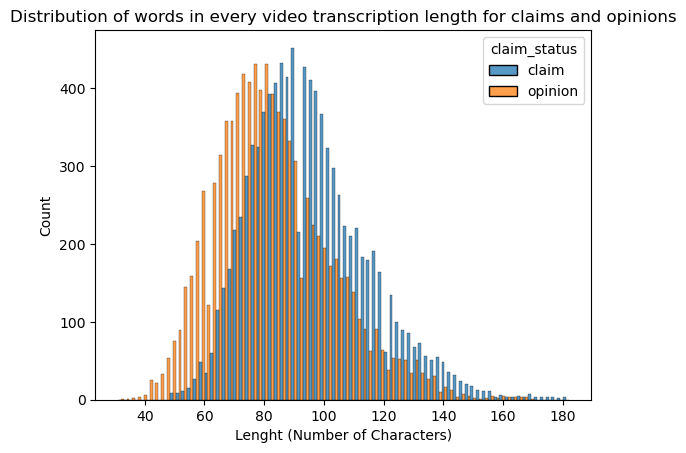

In [17]:
# Visualize the distribution of `text_length` for claims and opinions
# Create two histograms in one plot
sns.histplot(data=df, stat="count", x="Lenght", hue="claim_status", legend=True, multiple="dodge")
plt.xlabel("Lenght (Number of Characters)")
plt.ylabel("Count")
plt.title("Distribution of words in every video transcription length for claims and opinions")

**Feature selection and transformation**

Encode target and catgorical variables.

In [18]:
# Create a copy of the X data
X = df.copy()
# Drop unnecessary columns
X=X.drop(["video_id","#"], axis=1)
# Encode target variable
X['claim_status'] = X['claim_status'].replace({"opinion": 0, "claim": 1})
# Dummy encode remaining categorical values
X = pd.get_dummies(X,columns=["verified_status", "author_ban_status"],drop_first=True)
X.head()

,claim_status,video_duration_sec,video_transcription_text,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,Lenght,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,1,59,someone shared with me that drone deliveries a...,343296.0,19425.0,241.0,1.0,0.0,97,False,False,True
1,1,32,someone shared with me that there are more mic...,140877.0,77355.0,19034.0,1161.0,684.0,107,False,False,False
2,1,31,someone shared with me that american industria...,902185.0,97690.0,2858.0,833.0,329.0,137,False,False,False
3,1,25,someone shared with me that the metro of st. p...,437506.0,239954.0,34812.0,1234.0,584.0,131,False,False,False
4,1,19,someone shared with me that the number of busi...,56167.0,34987.0,4110.0,547.0,152.0,128,False,False,False


### **Task 4: Split the data**

Assign target variable.

In [19]:
# Isolate target variable
y=X["claim_status"]
y.value_counts()

claim_status
1    9608
0    9476
Name: count, dtype: int64

Isolate the features.

In [20]:
# Isolate features
X = X.drop(['claim_status'], axis=1)
# Display first few rows of features dataframe
X.head()

,video_duration_sec,video_transcription_text,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,Lenght,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,59,someone shared with me that drone deliveries a...,343296.0,19425.0,241.0,1.0,0.0,97,False,False,True
1,32,someone shared with me that there are more mic...,140877.0,77355.0,19034.0,1161.0,684.0,107,False,False,False
2,31,someone shared with me that american industria...,902185.0,97690.0,2858.0,833.0,329.0,137,False,False,False
3,25,someone shared with me that the metro of st. p...,437506.0,239954.0,34812.0,1234.0,584.0,131,False,False,False
4,19,someone shared with me that the number of busi...,56167.0,34987.0,4110.0,547.0,152.0,128,False,False,False


#### **Task 5: Create train/validate/test sets**

Split data into training and testing sets, 80/20.

In [21]:
# Split the data into training and testing sets
X_train1, X_test, y_train1, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

Split the training set into training and validation sets, 75/25, to result in a final ratio of 60/20/20 for train/validate/test sets.

In [22]:
# Split the training data into training and validation sets
X_train2, X_value, y_train2, y_value = train_test_split(X_train1, y_train1, test_size=0.25, random_state=0)

Confirm that the dimensions of the training, validation, and testing sets are in alignment.

In [23]:
# Get shape of each training, validation, and testing set
X_train1.shape, X_test.shape, y_test.shape, y_train2.shape, X_value.shape, y_value.shape

((15267, 11), (3817, 11), (3817,), (11450,), (3817, 11), (3817,))

In [24]:
# Getting shapes of y training sets
y_train1, y_train2

(4874     1
 1569     1
 479      1
 14161    0
 14846    0
         ..
 9225     1
 13123    0
 9845     0
 10799    0
 2732     1
 Name: claim_status, Length: 15267, dtype: int64,
 14829    0
 7396     1
 2287     1
 18712    0
 9931     0
         ..
 18043    0
 11462    0
 6819     1
 11795    0
 4092     1
 Name: claim_status, Length: 11450, dtype: int64)

### Making Tokens (with external help)

In [27]:
# Set up a `CountVectorizer` object, which converts a collection of text to a matrix of token counts
count_vec = CountVectorizer(ngram_range=(2, 3),
                            max_features=15,
                            stop_words='english')
count_vec

,video_duration_sec,video_transcription_text,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,Lenght,verified_status_verified,author_ban_status_banned,author_ban_status_under review
14829,51,my family's opinion is that the total number o...,2487.0,310.0,20.0,1.0,0.0,134,False,False,False
7396,43,a friend read a study mentioning that bubble w...,118512.0,3543.0,374.0,70.0,29.0,97,False,True,False
2287,22,a friend read online that the longest recorde...,105902.0,1885.0,229.0,39.0,9.0,76,False,False,True
18712,17,my family is convinced that it snows in the s...,9245.0,1670.0,440.0,13.0,4.0,58,False,False,False
9931,18,i feel that halley’s comet won’t be seen again...,3791.0,660.0,63.0,9.0,1.0,57,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
18043,39,my family is willing to wager that canada has ...,6358.0,1599.0,307.0,27.0,0.0,73,True,False,False
11462,19,my thinking is that vinyl record sales now sur...,1972.0,379.0,43.0,4.0,0.0,69,False,False,False
6819,34,a colleague read in the media that the total ...,843938.0,559393.0,2375.0,12643.0,4104.0,142,False,False,False
11795,21,my feeling is that it would take 258 earth day...,5922.0,1815.0,44.0,29.0,10.0,106,False,False,False


In [26]:
# Extract numerical features from `video_transcription_text` in the training set
count_data = count_vec.fit_transform(X_train2['video_transcription_text']).toarray()
count_data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [26]:
# Place the numerical representation of `video_transcription_text` from training set into a dataframe
count_df = pd.DataFrame(data=count_data, columns=count_vec.get_feature_names_out())

# Display first few rows
count_df.head()

,colleague discovered,colleague learned,colleague read,discovered news,discussion board,friend learned,friend read,internet forum,learned media,media claim,news claim,point view,read media,social media,willing wager
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [27]:
# Concatenate `X_train` and `count_df` to form the final dataframe for training data (`X_train_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_train after dropping `video_transcription_text`,
# so that the indices align with those in `X_train` and `count_df`
X_train_final = pd.concat([X_train2.drop(columns=['video_transcription_text']).reset_index(drop=True), count_df], axis=1)

# Display first few rows
X_train_final.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,Lenght,verified_status_verified,author_ban_status_banned,author_ban_status_under review,...,friend learned,friend read,internet forum,learned media,media claim,news claim,point view,read media,social media,willing wager
0,51,2487.0,310.0,20.0,1.0,0.0,134,False,False,False,...,0,0,0,0,0,0,0,0,0,0
1,43,118512.0,3543.0,374.0,70.0,29.0,97,False,True,False,...,0,1,0,0,0,0,0,0,0,0
2,22,105902.0,1885.0,229.0,39.0,9.0,76,False,False,True,...,0,1,0,0,0,0,0,0,0,0
3,17,9245.0,1670.0,440.0,13.0,4.0,58,False,False,False,...,0,0,0,0,0,0,0,0,0,0
4,18,3791.0,660.0,63.0,9.0,1.0,57,False,False,False,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# Extract numerical features from `video_transcription_text` in the testing set
validation_count_data = count_vec.transform(X_value['video_transcription_text']).toarray()
validation_count_data

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [29]:
# Place the numerical representation of `video_transcription_text` from validation set into a dataframe
validation_count_df = pd.DataFrame(data=validation_count_data, columns=count_vec.get_feature_names_out())
validation_count_df.head()

,colleague discovered,colleague learned,colleague read,discovered news,discussion board,friend learned,friend read,internet forum,learned media,media claim,news claim,point view,read media,social media,willing wager
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [30]:
# Concatenate `X_val` and `validation_count_df` to form the final dataframe for training data (`X_val_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_val after dropping `video_transcription_text`,
# so that the indices align with those in `validation_count_df`
X_val_final = pd.concat([X_value.drop(columns=['video_transcription_text']).reset_index(drop=True), validation_count_df], axis=1)

# Display first few rows
X_val_final.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,Lenght,verified_status_verified,author_ban_status_banned,author_ban_status_under review,...,friend learned,friend read,internet forum,learned media,media claim,news claim,point view,read media,social media,willing wager
0,11,578891.0,379596.0,14612.0,6591.0,44.0,72,False,False,True,...,0,0,0,0,0,0,0,1,0,0
1,24,6255.0,1709.0,311.0,13.0,1.0,96,False,False,False,...,0,0,0,0,0,0,0,0,0,0
2,35,410356.0,249714.0,26235.0,2060.0,1252.0,88,False,False,False,...,0,1,0,0,0,0,0,1,0,0
3,58,406911.0,25986.0,1230.0,564.0,248.0,83,False,False,False,...,0,0,0,0,0,0,0,0,0,0
4,47,972573.0,138167.0,25320.0,3331.0,968.0,104,False,False,True,...,0,0,0,0,0,0,0,1,0,0


In [31]:
# Extract numerical features from `video_transcription_text` in the testing set
test_count_data = count_vec.transform(X_test['video_transcription_text']).toarray()

# Place the numerical representation of `video_transcription_text` from test set into a dataframe
test_count_df = pd.DataFrame(data=test_count_data, columns=count_vec.get_feature_names_out())

# Concatenate `X_val` and `validation_count_df` to form the final dataframe for training data (`X_val_final`)
X_test_final = pd.concat([X_test.drop(columns=['video_transcription_text']
                                      ).reset_index(drop=True), test_count_df], axis=1)
X_test_final.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,Lenght,verified_status_verified,author_ban_status_banned,author_ban_status_under review,...,friend learned,friend read,internet forum,learned media,media claim,news claim,point view,read media,social media,willing wager
0,54,692084.0,135956.0,16591.0,622.0,312.0,107,False,False,False,...,0,0,0,1,1,0,0,0,0,0
1,37,5164.0,1858.0,36.0,17.0,1.0,69,True,False,True,...,0,0,0,0,0,0,0,0,0,0
2,39,801951.0,344163.0,57608.0,8578.0,2942.0,90,False,False,False,...,0,0,0,0,0,0,0,0,0,0
3,44,6429.0,2314.0,847.0,17.0,5.0,76,False,False,False,...,0,0,0,0,0,0,0,0,0,0
4,26,555780.0,106863.0,15348.0,252.0,91.0,72,False,False,False,...,0,0,0,0,0,0,0,0,0,0


### **Task 6. Build models**


### **Build a random forest model**

Fit a random forest model to the training set. Use cross-validation to tune the hyperparameters and select the model that performs best on recall.

In [32]:
# Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=42)
# Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [5, 7, None],'max_features': [0.3, 0.6],
             'max_samples': [0.7],'min_samples_leaf': [1,2],
             'min_samples_split': [2,3],'n_estimators': [75,100,200],}

# Define a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}
# Instantiate the GridSearchCV object
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='recall')
rf_cv

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 7, None], 'max_features': [0.3, 0.6],
                         'max_samples': [0.7], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [75, 100, 200]},
             refit='recall', scoring={'precision', 'recall', 'accuracy', 'f1'})

In [33]:
%%time
rf_cv.fit(X_train_final, y_train2)

CPU times: user 5min 36s, sys: 534 ms, total: 5min 36s
Wall time: 5min 36s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 7, None], 'max_features': [0.3, 0.6],
                         'max_samples': [0.7], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [75, 100, 200]},
             refit='recall', scoring={'precision', 'recall', 'accuracy', 'f1'})

In [34]:
# Examine best parameters
rf_cv.best_params_

{'max_depth': None,
 'max_features': 0.6,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [35]:
# Examine best recall score
rf_cv.best_score_

0.9953408110440034

### **Build an XGBoost model**

In [36]:
# Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

# Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [4,8,12],'min_child_weight': [3, 5],
             'learning_rate': [0.01, 0.1],'n_estimators': [75,100,200]
             }

# Define a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='recall', n_jobs=-1)

In [37]:
%%time
# Fitting into XGB
XGB = xgb_cv.fit(X_train_final, y_train2)

CPU times: user 41.1 s, sys: 150 ms, total: 41.2 s
Wall time: 2min 24s


In [38]:
# Get all the results from the CV and put them in a df
cv_results  = xgb_cv.cv_results_
df_xgb = pd.DataFrame(cv_results)
df_xgb

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_min_child_weight,param_n_estimators,params,split0_test_precision,...,std_test_accuracy,rank_test_accuracy,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,mean_test_f1,std_test_f1,rank_test_f1
0,0.648223,0.031984,0.013366,0.000304,0.01,4,3,75,"{'learning_rate': 0.01, 'max_depth': 4, 'min_c...",1.000000,...,0.001798,31,0.996968,0.994360,0.994370,0.996102,0.991736,0.994707,0.001796,31
1,0.899063,0.015446,0.013060,0.000128,0.01,4,3,100,"{'learning_rate': 0.01, 'max_depth': 4, 'min_c...",1.000000,...,0.001798,31,0.996968,0.994360,0.994370,0.996102,0.991736,0.994707,0.001796,31
2,1.786227,0.053308,0.014609,0.000162,0.01,4,3,200,"{'learning_rate': 0.01, 'max_depth': 4, 'min_c...",1.000000,...,0.001648,17,0.996968,0.994360,0.995232,0.996102,0.992174,0.994967,0.001645,19
3,0.573687,0.054505,0.012489,0.000097,0.01,4,5,75,"{'learning_rate': 0.01, 'max_depth': 4, 'min_c...",1.000000,...,0.001798,22,0.996968,0.994360,0.995232,0.996102,0.991736,0.994880,0.001796,22
4,0.789649,0.050998,0.013233,0.000377,0.01,4,5,100,"{'learning_rate': 0.01, 'max_depth': 4, 'min_c...",1.000000,...,0.001798,22,0.996968,0.994360,0.995232,0.996102,0.991736,0.994880,0.001796,22
5,1.714224,0.080780,0.014461,0.000465,0.01,4,5,200,"{'learning_rate': 0.01, 'max_depth': 4, 'min_c...",1.000000,...,0.001798,22,0.996968,0.994360,0.995232,0.996102,0.991736,0.994880,0.001796,22
6,0.667974,0.052767,0.012926,0.000479,0.01,8,3,75,"{'learning_rate': 0.01, 'max_depth': 8, 'min_c...",1.000000,...,0.001798,31,0.996968,0.994360,0.994370,0.996102,0.991736,0.994707,0.001796,31
7,0.991714,0.087118,0.013745,0.000562,0.01,8,3,100,"{'learning_rate': 0.01, 'max_depth': 8, 'min_c...",1.000000,...,0.001798,31,0.996968,0.994360,0.994370,0.996102,0.991736,0.994707,0.001796,31
8,2.333957,0.069233,0.015394,0.000376,0.01,8,3,200,"{'learning_rate': 0.01, 'max_depth': 8, 'min_c...",1.000000,...,0.001648,17,0.996968,0.994360,0.995232,0.996102,0.992174,0.994967,0.001645,19
9,0.580298,0.036160,0.014076,0.002023,0.01,8,5,75,"{'learning_rate': 0.01, 'max_depth': 8, 'min_c...",1.000000,...,0.001798,22,0.996968,0.994360,0.995232,0.996102,0.991736,0.994880,0.001796,22


In [39]:
# Isolate the row of the df with the max(mean precision score)
max_precision = df_xgb["mean_test_precision"].idxmax()
row_max = df_xgb.loc[max_precision]
print(row_max)

mean_fit_time                                                      1.786227
std_fit_time                                                       0.053308
mean_score_time                                                    0.014609
std_score_time                                                     0.000162
param_learning_rate                                                    0.01
param_max_depth                                                           4
param_min_child_weight                                                    3
param_n_estimators                                                      200
params                    {'learning_rate': 0.01, 'max_depth': 4, 'min_c...
split0_test_precision                                                   1.0
split1_test_precision                                                   1.0
split2_test_precision                                                   1.0
split3_test_precision                                                   1.0
split4_test_

<img src="images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**
Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Task 7. Evaluate model**

Evaluate models against validation criteria.

#### **Random forest**

In [40]:
# Use the random forest "best estimator" model to get predictions on the encoded testing set
y_predict = rf_cv.best_estimator_.predict(X_val_final)

Display the predictions on the encoded testing set.

In [41]:
# Display the predictions on the encoded testing set
y_predict

array([1, 0, 1, ..., 1, 1, 1])

Display the true labels of the testing set.

In [42]:
# Display the true labels of the testing set
y_value

5846     1
12058    0
2975     1
8432     1
6863     1
        ..
6036     1
6544     1
2781     1
6426     1
4450     1
Name: claim_status, Length: 3817, dtype: int64

Create a confusion matrix to visualize the results of the classification model.

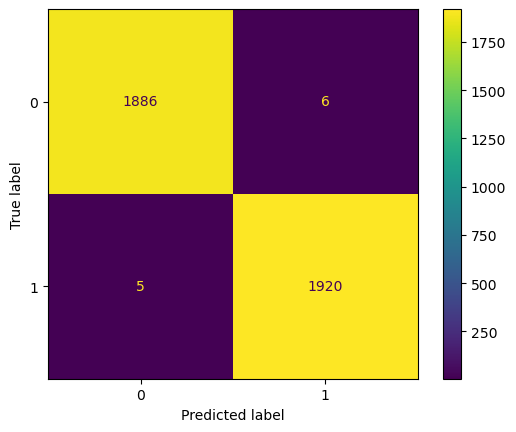

In [43]:
# Create a confusion matrix to visualize the results of the classification model
# Compute values for confusion matrix
CM = confusion_matrix(y_value,y_predict)
# Create display of confusion matrix
log_display = ConfusionMatrixDisplay(confusion_matrix=CM)
# Plot confusion matrix
log_display.plot()
# Display plot
plt.show()

Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the model.

In [44]:
# Create a classification report
# Create classification report for random forest model
target_labels = ['opinion', 'claim']
print(classification_report(y_value, y_predict, target_names=target_labels))

              precision    recall  f1-score   support

     opinion       1.00      1.00      1.00      1892
       claim       1.00      1.00      1.00      1925

    accuracy                           1.00      3817
   macro avg       1.00      1.00      1.00      3817
weighted avg       1.00      1.00      1.00      3817



**Question:** What does your classification report show? What does the confusion matrix indicate?

#### **XGBoost**

In [45]:
#Evaluate XGBoost model
y_predict = xgb_cv.best_estimator_.predict(X_val_final)
y_predict

array([1, 0, 1, ..., 1, 1, 1])

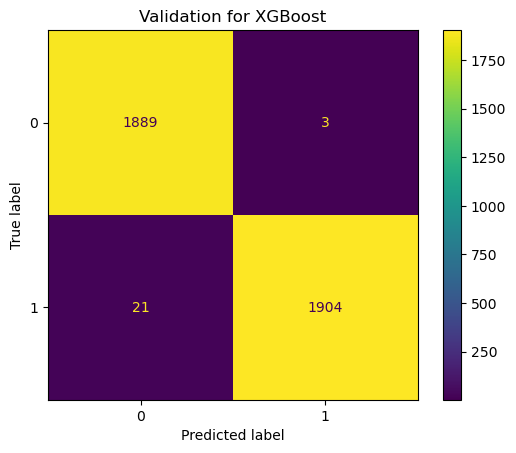

In [46]:
# Compute values for confusion matrix
CM1 = confusion_matrix(y_value, y_predict)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=CM1)

# Plot confusion matrix
log_disp.plot()

# Display plot
plt.title('Validation for XGBoost');
plt.show()

In [47]:
# Create a classification report
target_labels = ['opinion', 'claim']
print(classification_report(y_value, y_predict, target_names=target_labels))

              precision    recall  f1-score   support

     opinion       0.99      1.00      0.99      1892
       claim       1.00      0.99      0.99      1925

    accuracy                           0.99      3817
   macro avg       0.99      0.99      0.99      3817
weighted avg       0.99      0.99      0.99      3817



**Question:** Describe your XGBoost model results. How does your XGBoost model compare to your random forest model?

### **Use champion model to predict on test data**

In [48]:
# Using Champion Model
y_predict2 = rf_cv.best_estimator_.predict(X_test_final)

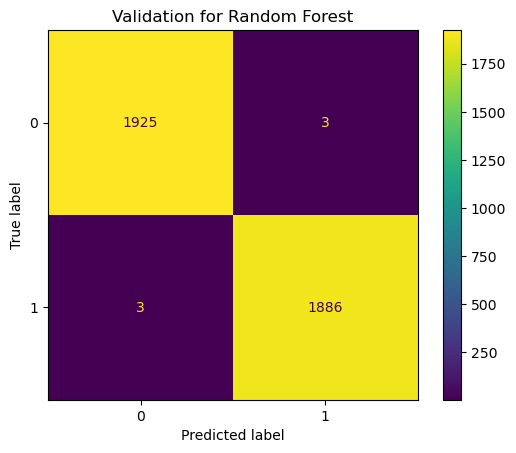

In [53]:
# Compute values for confusion matrix
CM2 = confusion_matrix(y_test, y_predict2)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=CM2)

# Plot confusion matrix
log_disp.plot()

# Display plot
plt.title('Validation for Random Forest');
plt.show()

#### **Feature importances of champion model**


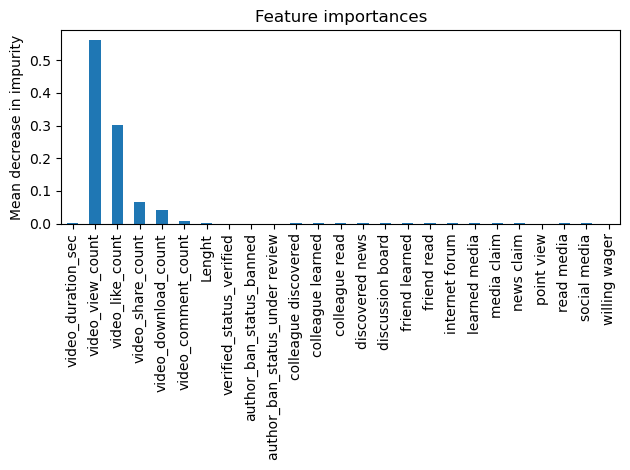

In [54]:
importances = rf_cv.best_estimator_.feature_importances_
rf_importances = pd.Series(importances, index=X_test_final.columns)
fig, ax = plt.subplots()
rf_importances.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout()

### **Task 8. Conclusion**

In this step use the results of the models above to formulate a conclusion. Consider the following questions:

1. **Would you recommend using this model? Why or why not?**
Absolutely. As it is shown in the different confusion matrices, the predictions were highly accurate, being a small percentage the ones that were either false positives and negatives.
2. **What was your model doing? Can you explain how it was making predictions?**
It is a model that analyzes the data and aims to classify comments, between claims and opinions. Classifiers as XGBoost uses features that make the computer able to learn patterns and associations that distinguish wich ones were claims and which one is an opinion.
3. **Are there new features that you can engineer that might improve model performance?**
Yes, mostly on the metadata, which may give valuable information to make the predictions even more accurate.